<a href="https://colab.research.google.com/github/Nayana-manoharan/DeepLearning/blob/main/MobileNet_Hand_written_digits_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, Flatten, Lambda,Dropout
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

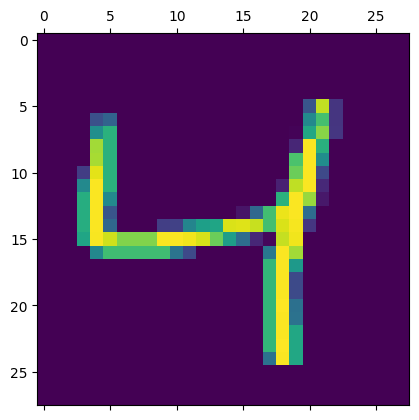

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[2]

4

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Define the model
model = Sequential([
    # Reshape and convert grayscale to RGB
    Lambda(lambda x: tf.image.grayscale_to_rgb(tf.image.resize(tf.expand_dims(x, axis=-1), (224, 224)))),

    # Add the pre-trained VGG16 model
    base_model,

    # Flatten the output
    Flatten(),

    # Dense layers
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    # Output layer
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)




17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 32ms/step - accuracy: 0.7771 - loss: 0.7227 - val_accuracy: 0.9900 - val_loss: 0.0348
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 69s 29ms/step - accuracy: 0.9778 - loss: 0.0761 - val_accuracy: 0.9922 - val_loss: 0.0241
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9866 - loss: 0.0442 - val_accuracy: 0.9923 - val_loss: 0.0229
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9893 - loss: 0.0340 - val_accuracy: 0.9933 - val_loss: 0.0231
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9948 - val_loss: 0.0197
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9943 - loss: 0.0192 - val_accuracy: 0.9952 - val_loss: 0.0189
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9956 - loss: 0.0140 - val_accuracy: 0.9960 - val_loss: 0.0180
Epoch 8/10
1688/1688 ━━━━

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

Test accuracy: 0.9928


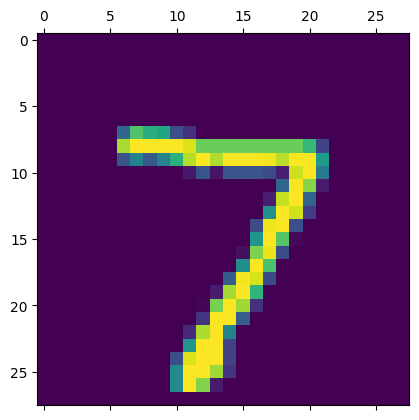

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted=model.predict(X_test)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step


array([9.78865223e-14, 5.92946222e-12, 2.51295963e-11, 1.12615565e-13,
       6.83038218e-12, 6.17513022e-15, 8.01404288e-16, 1.00000000e+00,
       2.12362974e-10, 1.12937849e-12], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

7

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    1,    0,    0,    0,    1,    0,    0,    0],
       [   0, 1134,    1,    0,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1026,    0,    0,    0,    0,    3,    0,    0],
       [   0,    0,    3,  995,    0,   10,    0,    1,    1,    0],
       [   0,    0,    0,    0,  978,    0,    0,    0,    0,    4],
       [   0,    0,    1,    1,    0,  888,    1,    0,    0,    1],
       [   3,    2,    0,    0,    1,    6,  945,    0,    1,    0],
       [   0,    2,    4,    1,    0,    1,    0, 1020,    0,    0],
       [   0,    0,    0,    0,    1,    0,    0,    0,  971,    2],
       [   0,    1,    0,    0,    8,    3,    0,    2,    2,  993]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

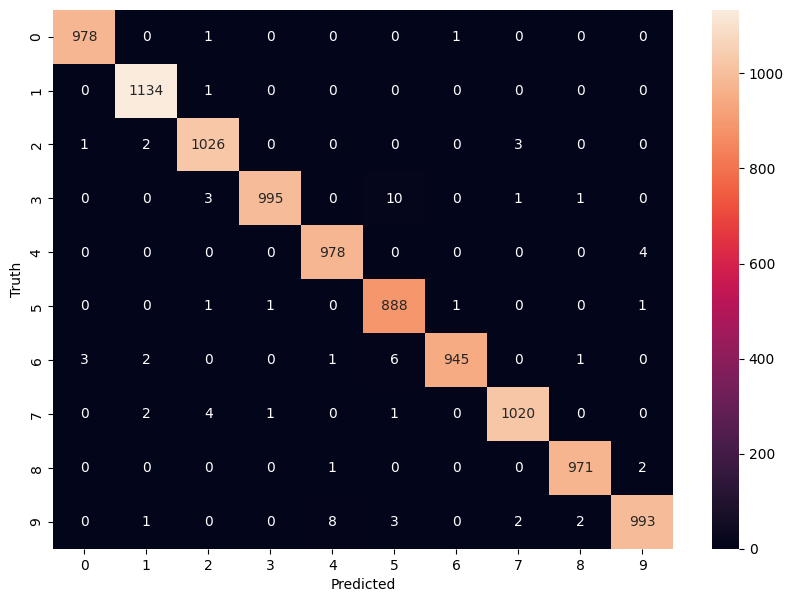

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Fine-tuning
# Unfreeze the top layers of the base model
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

# Recompile the model
model.compile(optimizer=tf.keras.optimizers.Adam(1e-6),  # Lower learning rate
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(X_train, y_train,
                         batch_size=32,
                         epochs=5,
                         validation_split=0.1,
                         verbose=1)



Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9606 - loss: 0.1588 - val_accuracy: 0.9920 - val_loss: 0.0354
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.9826 - loss: 0.0582 - val_accuracy: 0.9930 - val_loss: 0.0312
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9880 - loss: 0.0352 - val_accuracy: 0.9932 - val_loss: 0.0283
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9892 - loss: 0.0318 - val_accuracy: 0.9935 - val_loss: 0.0265
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9916 - loss: 0.0259 - val_accuracy: 0.9942 - val_loss: 0.0258


In [ ]:
# Final evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Final test accuracy: {test_accuracy:.4f}")



Final test accuracy: 0.9918


In [ ]:
# Save the model
model.save('mobilenet_mnist.h5')

In [ ]:
y_predicted1=model.predict(X_test)
y_predicted_labels1=[np.argmax(i) for i in y_predicted1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step


In [ ]:
cm1=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels1)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    2,    0,    1,    0,    0,    0,    0,    0],
       [   0, 1131,    0,    1,    1,    0,    1,    1,    0,    0],
       [   1,    3, 1022,    0,    0,    0,    0,    4,    1,    1],
       [   0,    0,    2,  999,    0,    7,    0,    1,    1,    0],
       [   0,    0,    0,    0,  979,    0,    0,    0,    0,    3],
       [   0,    0,    1,    3,    0,  885,    2,    0,    0,    1],
       [   4,    4,    0,    0,    2,    3,  945,    0,    0,    0],
       [   0,    4,    3,    0,    2,    1,    0, 1018,    0,    0],
       [   1,    0,    0,    0,    0,    1,    0,    0,  970,    2],
       [   0,    0,    0,    1,    9,    4,    0,    2,    1,  992]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

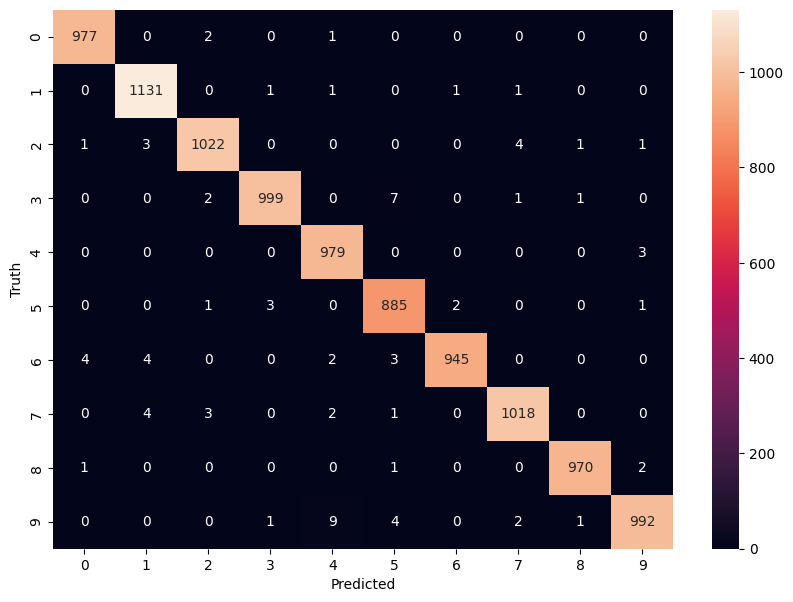

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm1,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

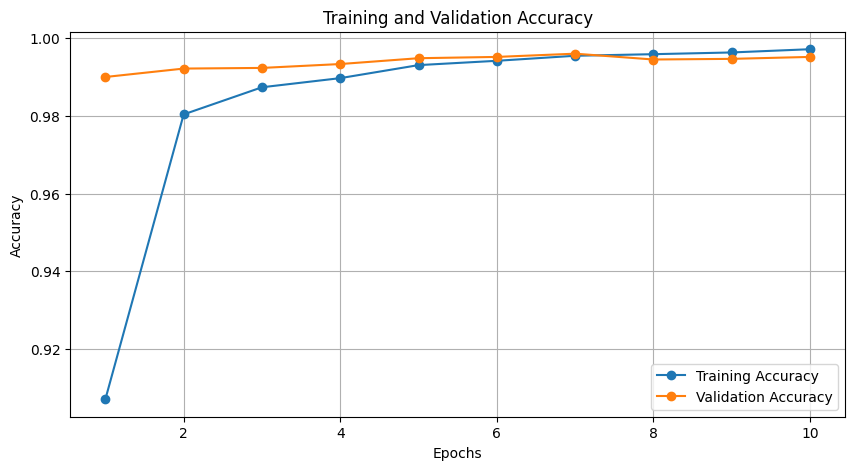

In [ ]:
import matplotlib.pyplot as plt



# Extract accuracy from history

train_accuracy = history.history['accuracy']

val_accuracy = history.history['val_accuracy']

epochs = range(1, len(train_accuracy) + 1)



# Plot training and validation accuracy

plt.figure(figsize=(10, 5))

plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o')

plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')

plt.title('Training and Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.grid()

plt.show()